# Artificial Neural Network Atlas Data

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.preprocessing import LabelEncoder


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.utils import np_utils
from tensorflow.keras import optimizers
%matplotlib inline

Using TensorFlow backend.


In [2]:
#load in data
data=pd.read_csv('ATLAS-data.csv', delimiter=',',header=None)
labels=pd.read_csv('ATLAS-labels.csv', delimiter=',',header=None)
print(data.shape)
print(data.head())
print(data.info())
print(data.describe())

(10000, 30)
        0       1        2        3      4        5      6      7       8   \
0  243.128  96.455  158.618   90.253  0.693   56.238  1.581  3.615  13.597   
1  139.751  74.028  111.619   44.266  2.119  104.723 -0.498  2.533   9.437   
2  116.217  73.136   59.239  101.850  0.625   85.539  2.979  1.922  28.049   
3   64.544   0.099   28.945  341.418  2.390  358.936 -1.181  0.714  35.293   
4   32.281  67.393   26.006   29.088  1.330  108.191 -0.362  0.846  48.389   

        9   ...     20       21   22       23     24     25      26     27  \
0  264.586  ...  2.121  376.410  3.0   46.248 -0.958 -0.444  42.759 -1.651   
1  168.638  ...  0.447  252.698  2.0   36.798  0.269 -1.254  31.816 -1.849   
2  202.636  ...  1.816  271.485  2.0   82.453  2.066 -1.210  58.216  1.442   
3  508.349  ... -2.409  470.806  3.0  331.152 -1.693  0.615  41.742  0.697   
4  152.087  ... -1.421  244.220  2.0   48.198  0.949  1.517  40.382 -0.382   

      28       29  
0 -1.445  157.638  
1  0.664  

In [3]:
#Check for missign values
total=data.isnull().sum().sort_values(ascending=False)
percent = round(data.isnull().sum().sort_values(ascending = False)/len(data)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])


,Total,Percent
29,0,0.0
28,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,0,0.0
6,0,0.0
7,0,0.0
8,0,0.0


In [4]:
X=data
y=labels.values.ravel()

In [5]:
#Normalise the data between 0 and 1
sc=StandardScaler()
X_scaled_data = sc.fit_transform(data)

In [6]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_data, y,test_size = 0.3, random_state=42)   #scale the test data as well
#Train Validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [51]:
#Build sequential model
model = Sequential()
model.add(Dense(300, input_dim=30, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 300)               9300      
_________________________________________________________________
dropout_33 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 150)               45150     
_________________________________________________________________
dropout_34 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 60)                9060      
_________________________________________________________________
dropout_35 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 1)               

In [52]:
model.get_config()
model.get_weights()


[array([[ 0.07488914, -0.1338092 ,  0.07140493, ..., -0.1325856 ,
          0.05571657, -0.05869479],
        [-0.12876676, -0.05764055,  0.11146399, ...,  0.12456663,
         -0.12282806,  0.11847053],
        [ 0.02621631,  0.09973185, -0.07123175, ...,  0.11813001,
         -0.10123789, -0.12878993],
        ...,
        [ 0.10984147, -0.06065664,  0.04413953, ..., -0.10459988,
         -0.10396813, -0.11732882],
        [-0.04320851, -0.11093017, -0.11535189, ..., -0.00506765,
         -0.10157774, -0.09182393],
        [-0.02151667,  0.0282342 ,  0.01279376, ...,  0.02376939,
          0.02082328,  0.055732  ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [53]:
#Compile and fit the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val),verbose=1)

Train on 7000 samples, validate on 2100 samples
Epoch 1/100
7000/7000 [==============================] - 2s 328us/sample - loss: 0.7009 - accuracy: 0.5311 - val_loss: 0.6483 - val_accuracy: 0.6657
Epoch 2/100
7000/7000 [==============================] - 1s 136us/sample - loss: 0.6549 - accuracy: 0.6111 - val_loss: 0.6126 - val_accuracy: 0.7024
Epoch 3/100
7000/7000 [==============================] - 1s 135us/sample - loss: 0.6215 - accuracy: 0.6653 - val_loss: 0.5871 - val_accuracy: 0.7176
Epoch 4/100
7000/7000 [==============================] - 1s 134us/sample - loss: 0.6092 - accuracy: 0.6789 - val_loss: 0.5692 - val_accuracy: 0.7214
Epoch 5/100
7000/7000 [==============================] - 1s 137us/sample - loss: 0.5893 - accuracy: 0.6977 - val_loss: 0.5557 - val_accuracy: 0.7257
Epoch 6/100
7000/7000 [==============================] - 1s 135us/sample - loss: 0.5809 - accuracy: 0.6989 - val_loss: 0.5461 - val_accuracy: 0.7267
Epoch 7/100
7000/7000 [==============================] - 1

7000/7000 [==============================] - 1s 131us/sample - loss: 0.4234 - accuracy: 0.8084 - val_loss: 0.3838 - val_accuracy: 0.8205
Epoch 56/100
7000/7000 [==============================] - 1s 131us/sample - loss: 0.4228 - accuracy: 0.8061 - val_loss: 0.3816 - val_accuracy: 0.8219
Epoch 57/100
7000/7000 [==============================] - 1s 135us/sample - loss: 0.4246 - accuracy: 0.8049 - val_loss: 0.3804 - val_accuracy: 0.8210
Epoch 58/100
7000/7000 [==============================] - 1s 133us/sample - loss: 0.4214 - accuracy: 0.8084 - val_loss: 0.3790 - val_accuracy: 0.8214
Epoch 59/100
7000/7000 [==============================] - 1s 135us/sample - loss: 0.4241 - accuracy: 0.8024 - val_loss: 0.3781 - val_accuracy: 0.8219
Epoch 60/100
7000/7000 [==============================] - 1s 127us/sample - loss: 0.4130 - accuracy: 0.8091 - val_loss: 0.3769 - val_accuracy: 0.8238
Epoch 61/100
7000/7000 [==============================] - 1s 133us/sample - loss: 0.4166 - accuracy: 0.8084 - val

# Validation of the model

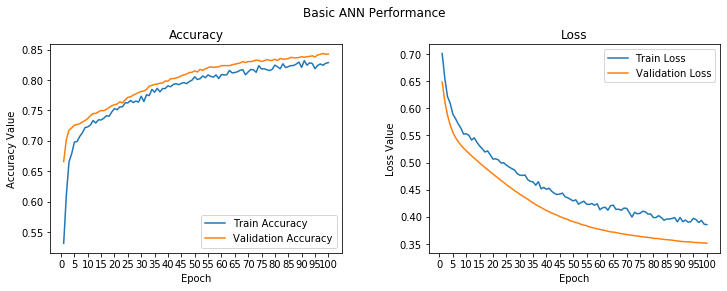

In [54]:
#Print out the statistics from the classifier
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic ANN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
#Plotting accuracy Statistics according to epoch
epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [55]:
y_pred = model.predict(X_test)
print(y_pred)

[[6.3462849e-03]
 [6.2538648e-01]
 [6.2539417e-01]
 ...
 [3.8253256e-05]
 [6.5517861e-01]
 [7.9389110e-02]]


In [56]:
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

3000/3000 [==============================] - 0s 48us/sample - loss: 0.4142 - accuracy: 0.8167
[0.4142085426648458, 0.81666666]


In [57]:
print(confusion_matrix(y_test, y_pred.round()))
print(classification_report(y_test,y_pred.round()))

[[1311  230]
 [ 320 1139]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1541
           1       0.83      0.78      0.81      1459

    accuracy                           0.82      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.82      0.82      0.82      3000



0.899715298407388


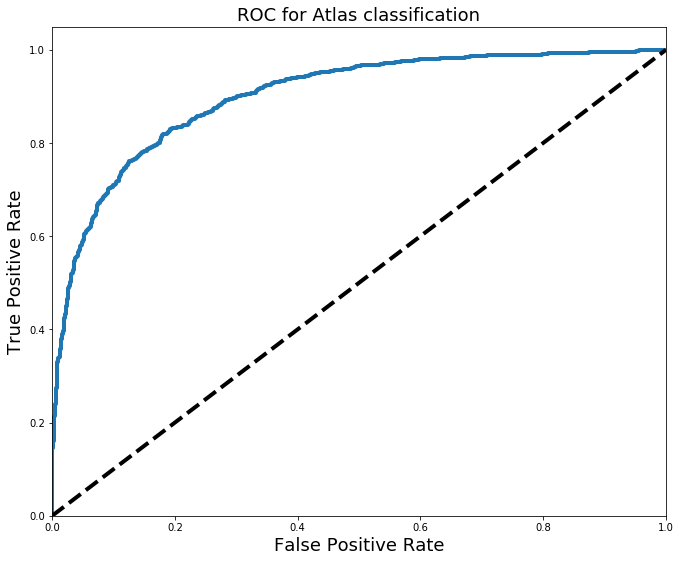

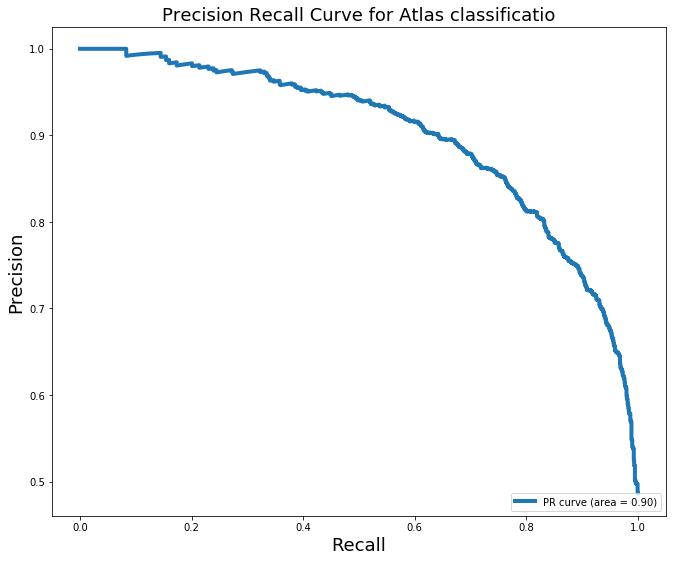

In [58]:
FPR, TPR, _ = roc_curve(y_test, y_pred)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Atlas classification', fontsize= 18)
plt.show()
#Precision recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Atlas classificatio', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Artificial neural network Cross Validation

In [59]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = Sequential()
    model.add(Dense(300, input_dim=30, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(150, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(60, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
    return model


In [60]:
#Repartition the normalised data
X_train, X_test, y_train, y_test = train_test_split(X_scaled_data, y,test_size = 0.3, random_state=42)

In [61]:
#Now with cross validation 10 fold
k = 4
num_val_samples = len(X_train) // k
num_epochs = 100
all_accuracy_history = []
for i in range(k):
    print('processing fold #', i+1)
    # Prepare the validation data: data from partition # k
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=1)
    accuracy_history = history.history['accuracy']
    all_accuracy_history.append(accuracy_history)


processing fold # 1
Train on 5250 samples, validate on 1750 samples
Epoch 1/100
5250/5250 [==============================] - 16s 3ms/sample - loss: 0.6573 - accuracy: 0.6057 - val_loss: 0.5948 - val_accuracy: 0.7051
Epoch 2/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.5798 - accuracy: 0.7116 - val_loss: 0.5874 - val_accuracy: 0.7063
Epoch 3/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.5834 - accuracy: 0.7211 - val_loss: 0.6023 - val_accuracy: 0.7137
Epoch 4/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.5747 - accuracy: 0.7318 - val_loss: 0.6141 - val_accuracy: 0.7137
Epoch 5/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.5763 - accuracy: 0.7356 - val_loss: 0.6135 - val_accuracy: 0.7211
Epoch 6/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.5727 - accuracy: 0.7402 - val_loss: 0.6044 - val_accuracy: 0.7257
Epoch 7/100
5250/5250 [=====================

5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4571 - accuracy: 0.8328 - val_loss: 0.5475 - val_accuracy: 0.8160
Epoch 56/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4653 - accuracy: 0.8411 - val_loss: 0.5512 - val_accuracy: 0.8149
Epoch 57/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4562 - accuracy: 0.8408 - val_loss: 0.5623 - val_accuracy: 0.8143
Epoch 58/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4576 - accuracy: 0.8370 - val_loss: 0.5548 - val_accuracy: 0.8166
Epoch 59/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4675 - accuracy: 0.8389 - val_loss: 0.5517 - val_accuracy: 0.8183
Epoch 60/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4630 - accuracy: 0.8387 - val_loss: 0.5553 - val_accuracy: 0.8177
Epoch 61/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4645 - accuracy: 0.8419 - val_loss: 

5250/5250 [==============================] - 15s 3ms/sample - loss: 0.5468 - accuracy: 0.7518 - val_loss: 0.4874 - val_accuracy: 0.7834
Epoch 10/100
5250/5250 [==============================] - 16s 3ms/sample - loss: 0.5388 - accuracy: 0.7606 - val_loss: 0.4771 - val_accuracy: 0.7909
Epoch 11/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.5296 - accuracy: 0.7640 - val_loss: 0.4656 - val_accuracy: 0.8034
Epoch 12/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.5197 - accuracy: 0.7749 - val_loss: 0.4652 - val_accuracy: 0.8057
Epoch 13/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.5275 - accuracy: 0.7703 - val_loss: 0.4537 - val_accuracy: 0.8126
Epoch 14/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.5092 - accuracy: 0.7811 - val_loss: 0.4517 - val_accuracy: 0.8137
Epoch 15/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.5067 - accuracy: 0.7832 - val_loss: 

5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4696 - accuracy: 0.8400 - val_loss: 0.4450 - val_accuracy: 0.8446
Epoch 65/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4659 - accuracy: 0.8356 - val_loss: 0.4453 - val_accuracy: 0.8486
Epoch 66/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4498 - accuracy: 0.8379 - val_loss: 0.4516 - val_accuracy: 0.8474
Epoch 67/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4643 - accuracy: 0.8417 - val_loss: 0.4566 - val_accuracy: 0.8480
Epoch 68/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4610 - accuracy: 0.8394 - val_loss: 0.4546 - val_accuracy: 0.8491
Epoch 69/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4599 - accuracy: 0.8371 - val_loss: 0.4555 - val_accuracy: 0.8486
Epoch 70/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4814 - accuracy: 0.8377 - val_loss: 

5250/5250 [==============================] - 15s 3ms/sample - loss: 0.5000 - accuracy: 0.8015 - val_loss: 0.5041 - val_accuracy: 0.8011
Epoch 19/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4826 - accuracy: 0.8072 - val_loss: 0.4983 - val_accuracy: 0.8051
Epoch 20/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4856 - accuracy: 0.8051 - val_loss: 0.5030 - val_accuracy: 0.8023
Epoch 21/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4873 - accuracy: 0.8120 - val_loss: 0.4971 - val_accuracy: 0.8040
Epoch 22/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4929 - accuracy: 0.8074 - val_loss: 0.4870 - val_accuracy: 0.8074
Epoch 23/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4799 - accuracy: 0.8128 - val_loss: 0.4999 - val_accuracy: 0.8097
Epoch 24/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4788 - accuracy: 0.8139 - val_loss: 

5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4694 - accuracy: 0.8434 - val_loss: 0.5196 - val_accuracy: 0.8263
Epoch 74/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4796 - accuracy: 0.8377 - val_loss: 0.5087 - val_accuracy: 0.8320
Epoch 75/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4743 - accuracy: 0.8419 - val_loss: 0.5127 - val_accuracy: 0.8246
Epoch 76/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4724 - accuracy: 0.8423 - val_loss: 0.5175 - val_accuracy: 0.8257
Epoch 77/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4770 - accuracy: 0.8438 - val_loss: 0.5155 - val_accuracy: 0.8263
Epoch 78/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4691 - accuracy: 0.8429 - val_loss: 0.5110 - val_accuracy: 0.8269
Epoch 79/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4645 - accuracy: 0.8436 - val_loss: 

5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4681 - accuracy: 0.8171 - val_loss: 0.5015 - val_accuracy: 0.8166
Epoch 28/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4648 - accuracy: 0.8202 - val_loss: 0.5035 - val_accuracy: 0.8177
Epoch 29/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4643 - accuracy: 0.8210 - val_loss: 0.5042 - val_accuracy: 0.8206
Epoch 30/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4653 - accuracy: 0.8196 - val_loss: 0.5052 - val_accuracy: 0.8217
Epoch 31/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4713 - accuracy: 0.8267 - val_loss: 0.5055 - val_accuracy: 0.8194
Epoch 32/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4696 - accuracy: 0.8141 - val_loss: 0.5063 - val_accuracy: 0.8246
Epoch 33/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4601 - accuracy: 0.8242 - val_loss: 

5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4464 - accuracy: 0.8474 - val_loss: 0.5587 - val_accuracy: 0.8263
Epoch 83/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4653 - accuracy: 0.8461 - val_loss: 0.5530 - val_accuracy: 0.8257
Epoch 84/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4586 - accuracy: 0.8463 - val_loss: 0.5547 - val_accuracy: 0.8234
Epoch 85/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4565 - accuracy: 0.8480 - val_loss: 0.5560 - val_accuracy: 0.8246
Epoch 86/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4594 - accuracy: 0.8440 - val_loss: 0.5492 - val_accuracy: 0.8257
Epoch 87/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4653 - accuracy: 0.8457 - val_loss: 0.5498 - val_accuracy: 0.8257
Epoch 88/100
5250/5250 [==============================] - 15s 3ms/sample - loss: 0.4519 - accuracy: 0.8442 - val_loss: 

In [62]:
average_accuracy_history = [
    np.mean([x[i] for x in all_accuracy_history]) for i in range(num_epochs)]

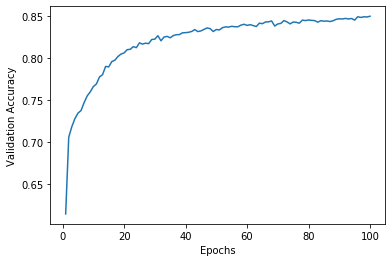

In [63]:
plt.plot(range(1, len(average_accuracy_history) + 1), average_accuracy_history)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

# Ensemble Neural networks

In [68]:

def build_model():
#Build first sequential model
    model1 = Sequential()
    model1.add(Dense(300, input_dim=30, activation='relu'))
    model1.add(Dropout(0.3))
    model1.add(Dense(60, activation='relu'))
    model1.add(Dropout(0.3))
    model1.add(Dense(1,activation='sigmoid'))
    model1.summary()
    model1.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=2e-5),
                  metrics=['accuracy'])
    return model

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 300)               9300      
_________________________________________________________________
dropout_48 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 60)                18060     
_________________________________________________________________
dropout_49 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 61        
Total params: 27,421
Trainable params: 27,421
Non-trainable params: 0
_________________________________________________________________
Train on 7000 samples, validate on 2100 samples
Epoch 1/30
7000/7000 [==============================] - 2s 259us/sa

In [ ]:
#Now with cross validation 4 fold
k = 4
num_val_samples = len(X_train) // k
num_epochs = 100
all_accuracy_history = []
for i in range(k):
    print('processing fold #', i+1)
    # Prepare the validation data: data from partition # k
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model1 = build_model()
    # Train the model (in silent mode, verbose=0)
    history1 = model1.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=1)
    accuracy_history = history1.history['accuracy']
    all_accuracy_history.append(accuracy_history)

In [70]:
def build_model():
#Build first sequential model
    model1 = Sequential()
    model1.add(Dense(60, input_dim=30, activation='relu'))
    model1.add(Dropout(0.3))
    model1.add(Dense(100, activation='relu'))
    model1.add(Dropout(0.3))
    model1.add(Dense(60, activation='relu'))
    model1.add(Dropout(0.3))
    model1.add(Dense(1,activation='sigmoid'))
    model1.summary()
    model1.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=2e-5),
                  metrics=['accuracy'])
    return model

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 600)               18600     
_________________________________________________________________
dropout_50 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 180)               108180    
_________________________________________________________________
dropout_51 (Dropout)         (None, 180)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 60)                10860     
_________________________________________________________________
dropout_52 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_74 (Dense)             (None, 1)               